In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array


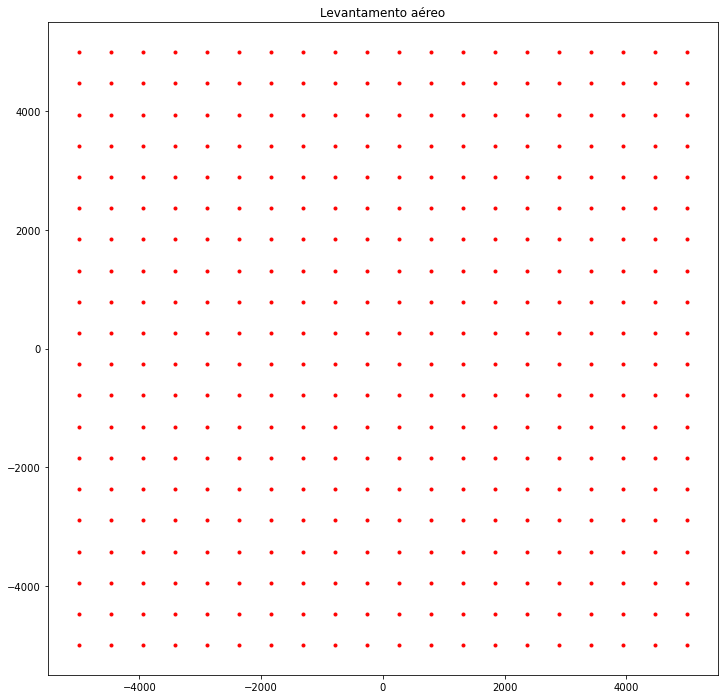

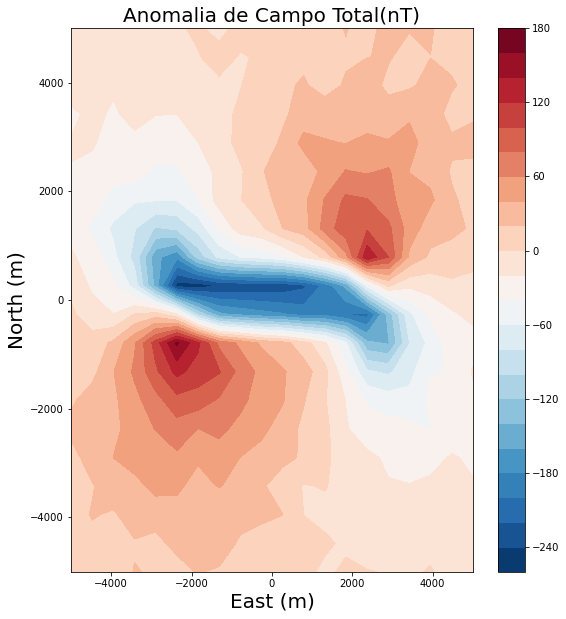

In [2]:
acquisition = {'nx': 20,
                  'ny': 20,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -50.0,
                  'color': '.r'}


x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)


data_cubo = pd.read_table('Logfile/30_10_2020_11_59/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))


plt.figure(figsize=(9,10))
plt.contourf(Y, X, anomaly_cubo, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


#plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

population = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n_dip': 10,
                'n_pop': 50,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'magmax': 2.5,
                'magmin': 1.5,
                'homogeneo': True
                }

I, D = 5.0, 70.0

filhos_mut = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'magmax': 2.5,
                'magmin': 1.5,
                'homogeneo': True
                }

ini = time.time()

populacao = Operators_array.create_population(**population)
#print("População Inicial: {}".format(populacao))
print("\n")

val_fit = []
ind_better = []
anomaly_better = []
final_pop = []

In [3]:
fit_, anomaly = Operators_array.fit_value(X, Y, Z, I, D, populacao, anomaly_cubo)
min_fit = fit_.index(min(fit_))
ind_better.append(populacao[min_fit])
anomaly_better.append(anomaly[min_fit])
val_fit.append(min(fit_))

In [4]:
def tournament_selection(pop, fit_cada, p_pop = 0.25):
    """
    Função com o objetivo de selecionar os futuros pais, pelo dinâmica do Torneio.

    :param pop: População com n indivíduos.
    :param fit_cada: O valor de fitness para cada n indivpiduos.

    :return chosen: Lista com os n pais.
    """

    pop_1 = pop.copy()
    chosen = []
    select = []
    for i in range(int(p_pop * len(pop))):
        capture_select = []
        # ---------------------------- Escolhidos para o torneio ---------------------------------#
        index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
        for j in range(int(0.2 * len(pop))):
            capture = [fit_cada[index_select[j]], index_select[j]]
            capture_select.append(capture)
        # ---------------------------- Vencedor do torneio ---------------------------------#
        escolhido = pop_1[min(capture_select[:])[1]]
        select.append(min(capture_select[:])[1])
        # ------------------ Retirada do vencedor da população artificial ------------------------#
        del (pop_1[min(capture_select[:])[1]])
        # ---------------------------- Vencedores do torneio ---------------------------------#
        chosen.append(escolhido)

    return chosen, select



In [8]:
probs = np.random.rand(2,3)
print(probs)
print(probs[0,0], probs[1,1])

[[0.89724595 0.14043736 0.99390972]
 [0.85501131 0.78004409 0.51460935]]
0.8972459513689441 0.7800440910279192


In [6]:
aa = np.linspace(0, 8, 9)
aa1 = aa[::-1]
print(aa, type(aa))
print(len(aa))
aa2 = aa[0:5]
aa3 = aa[4:len(aa)]
print(aa2, len(aa2))
print(aa3, len(aa3))

[0. 1. 2. 3. 4. 5. 6. 7. 8.] <class 'numpy.ndarray'>
9
[0. 1. 2. 3. 4.] 5
[4. 5. 6. 7. 8.] 5


In [9]:
'''if((n % 2) == 0){
   //n é par
}else{
   //n é ímpar
}'''

def crossover_polyamory(pais_torneio, escolhidos, fit):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    inv_pai = pai[::-1]
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    # Sorteio das probabilidades de forma randômica.
    #prob_pai, prob_mae, den = aux_operators_array.definition_prob(pais_torneio, escolhidos, fit, n_filhos)
    probs = np.random.rand(2,3)

    for j in range(n_filhos):
        num0 = (probs[0,0] * pai[j] + probs[0,1] * mae[j])
        filho0 = num0 / (probs[0,0] + probs[0,1]) # Cálculo do filho
        #print('Filho=', j, filho)
        num1 = (probs[1,0] * pai[j] + probs[1,1] * mae[j])
        filho1 = num1 / (probs[1,0] + probs[1,1]) # Cálculo do filho
        
        num2 = (probs[0,0] * inv_pai[j] + probs[0,1] * mae[j])
        filho2 = num2 / (probs[0,0] + probs[0,1])
        
        num3 = (probs[1,0] * inv_pai[j] + probs[1,1] * mae[j])
        filho3 = num3 / (probs[1,0] + probs[1,1])
        
        num4 = (probs[0,2] * inv_pai[j] + probs[1,2] * mae[j])
        filho4 = num4 / (probs[0,2] + probs[1,2])
        
        num5 = (probs[0,1] * inv_pai[j] + probs[1,2] * mae[j])
        filho5 = num5 / (probs[0,1] + probs[1,2])
        
        num6 = (probs[1,1] * inv_pai[j] + probs[0,2] * mae[j])
        filho6 = num6 / (probs[1,1] + probs[0,2])
        
        num7 = (probs[0,0] * inv_pai[j] + probs[1,2] * mae[j])
        filho7 = num7 / (probs[0,0] + probs[1,2])
        
        filhos += [filho0, filho1, filho2, filho3, filho4, filho5, filho6, filho7]

    return filhos


In [16]:
def elitismo(pop, filhos, fit_cada):
    n_fica = (len(pop) - len(filhos))
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
    piores = x.index[n_fica:]
    for index, pos in enumerate(piores): #Substituir os piores indivíduos pelos filhos
        pop[pos] = filhos[index]

    return pop


In [17]:
pais_, escolhidos = tournament_selection(populacao, fit_)
filho_ = crossover_polyamory(pais_, escolhidos, fit_)
filho_ = Operators_array.mutacao_vhomo(filho_, **filhos_mut)
populacao = elitismo(populacao, filho_, fit_)

In [22]:
print(pais_)
print(len(pais_))
escolhidos = aux_operators_array.count_index_fit(escolhidos)
print(escolhidos)

[array([[ 5.53726238e+02, -1.32763670e+03,  2.92070023e+03],
       [ 1.58772829e+02,  2.41686304e+01,  3.65521415e+03],
       [ 2.94379005e+03, -1.79782544e+03,  2.15794583e+03],
       [-2.18195844e+03, -8.69400590e+02,  3.57135633e+03],
       [ 1.09968627e+03, -2.86385419e+01,  5.84482387e+03],
       [-3.96216442e+02,  1.78212409e+03,  4.51503601e+03],
       [ 1.78840298e+03, -5.09843523e+02,  2.97239610e+03],
       [-5.95360632e+02, -9.40980939e+02,  3.49599037e+03],
       [ 9.56645791e+02,  5.67281445e+02,  5.19973040e+03],
       [ 3.53779638e+03,  5.77087590e+02,  1.88822180e+03],
       [-2.14058183e+00,  1.80450499e+00,  1.74508505e+00]]), array([[ 1.11416752e+02,  2.11475524e+03,  2.34041200e+03],
       [-3.32654483e+03,  1.06385140e+03,  4.50213729e+03],
       [ 2.32848480e+02,  3.36944917e+03,  1.95628896e+03],
       [ 2.42211502e+03,  2.45444959e+02,  2.66807708e+03],
       [ 3.04875192e+02, -2.82117064e+03,  5.53876316e+03],
       [-1.72036760e+02, -1.55931641e

In [25]:
print(filho_)
print(len(filho_))

[array([[-1.82479834e+02, -6.06017884e+02,  2.24355619e+03],
       [-1.81985069e+02, -1.96508305e+02,  3.40947720e+03],
       [ 2.73457763e+03, -9.98625639e+02,  2.54800300e+03],
       [-2.03577519e+03, -7.42847555e+02,  3.71807670e+03],
       [ 1.38725027e+03, -4.19922615e+02,  5.94863715e+03],
       [-3.73067275e+02,  9.44910444e+02,  4.88455645e+03],
       [ 1.25438069e+03, -8.65770558e+02,  2.93256797e+03],
       [-9.56835484e+01, -8.30995709e+02,  3.58504601e+03],
       [ 6.63767298e+02,  1.00706693e+03,  4.62020257e+03],
       [ 3.62580397e+03,  2.46745387e+02,  1.84993901e+03],
       [-1.19907118e+00,  2.05100278e+00,  1.73274348e+00]]), array([[-1.33828792e+03,  5.26888909e+02,  1.18047265e+03],
       [-7.16958563e+02, -5.42960470e+02,  3.02368202e+03],
       [ 2.40612421e+03,  2.56079576e+02,  3.16037399e+03],
       [-1.80627453e+03, -5.44165383e+02,  3.94842061e+03],
       [ 1.83871191e+03, -1.03421977e+03,  6.11161900e+03],
       [-3.36724198e+02, -3.69474680e

In [27]:
print(populacao)
print(len(populacao))

[array([[-1.18676009e+03,  1.50856073e+03,  2.16771064e+03],
       [-2.42273065e+03, -6.75820766e+02,  3.97962045e+03],
       [ 1.79997921e+03,  2.92560185e+03,  3.54800876e+03],
       [-1.69576013e+03,  1.69382566e+03,  4.44430782e+03],
       [ 1.23697165e+03, -3.00832182e+03,  4.81816528e+03],
       [-1.71362014e+03, -1.71402871e+03,  5.50631644e+03],
       [-4.55837165e+02, -5.07336696e+02,  4.17070676e+03],
       [ 1.32569543e+03,  4.00527835e+02,  4.25929777e+03],
       [ 8.07600063e+02,  4.63161257e+02,  1.75821810e+03],
       [ 6.93734415e+02, -2.47821408e+03,  1.65064027e+03],
       [ 6.87589443e-01,  2.12679956e+00,  1.83944284e+00]]), array([[-1.33828792e+03,  5.26888909e+02,  1.18047265e+03],
       [-7.16958563e+02, -5.42960470e+02,  3.02368202e+03],
       [ 2.40612421e+03,  2.56079576e+02,  3.16037399e+03],
       [-1.80627453e+03, -5.44165383e+02,  3.94842061e+03],
       [ 1.83871191e+03, -1.03421977e+03,  6.11161900e+03],
       [-3.36724198e+02, -3.69474680e